In [118]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

%matplotlib inline

import seaborn as sns

from scipy import stats

In [119]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.feature_selection import RFE

In [121]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.4f}'.format
plt.rcParams['figure.figsize'] = (15,8)

In [122]:
# Loading dataset

In [123]:
df_car_price = pd.read_csv('CarPrice_Assignment.csv')
df_car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [124]:
df_car_price.shape

(205, 26)

In [125]:
df_car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [126]:
df_car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [127]:
# There is no null values.

# Descritive statistics

In [128]:
df_car_price.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0000,103.0000,59.3226,1.0000,52.0000,103.0000,154.0000,205.0000
symboling,205.0000,0.8341,1.2453,-2.0000,0.0000,1.0000,2.0000,3.0000
wheelbase,205.0000,98.7566,6.0218,86.6000,94.5000,97.0000,102.4000,120.9000
carlength,205.0000,174.0493,12.3373,141.1000,166.3000,173.2000,183.1000,208.1000
carwidth,205.0000,65.9078,2.1452,60.3000,64.1000,65.5000,66.9000,72.3000
carheight,205.0000,53.7249,2.4435,47.8000,52.0000,54.1000,55.5000,59.8000
curbweight,205.0000,2555.5659,520.6802,1488.0000,2145.0000,2414.0000,2935.0000,4066.0000
enginesize,205.0000,126.9073,41.6427,61.0000,97.0000,120.0000,141.0000,326.0000
boreratio,205.0000,3.3298,0.2708,2.5400,3.1500,3.3100,3.5800,3.9400
stroke,205.0000,3.2554,0.3136,2.0700,3.1100,3.2900,3.4100,4.1700


In [129]:
df_car_price.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [130]:
df_car_price.skew()

car_ID              0.0000
symboling           0.2111
wheelbase           1.0502
carlength           0.1560
carwidth            0.9040
carheight           0.0631
curbweight          0.6814
enginesize          1.9477
boreratio           0.0202
stroke             -0.6897
compressionratio    2.6109
horsepower          1.4053
peakrpm             0.0752
citympg             0.6637
highwaympg          0.5400
price               1.7777
dtype: float64

In [131]:
df_car_price.kurt()

car_ID             -1.2000
symboling          -0.6763
wheelbase           1.0170
carlength          -0.0829
carwidth            0.7028
carheight          -0.4438
curbweight         -0.0429
enginesize          5.3057
boreratio          -0.7850
stroke              2.1744
compressionratio    5.2331
horsepower          2.6840
peakrpm             0.0868
citympg             0.5786
highwaympg          0.4401
price               3.0516
dtype: float64

In [132]:
df_car_price.std()

car_ID               59.3226
symboling             1.2453
wheelbase             6.0218
carlength            12.3373
carwidth              2.1452
carheight             2.4435
curbweight          520.6802
enginesize           41.6427
boreratio             0.2708
stroke                0.3136
compressionratio      3.9720
horsepower           39.5442
peakrpm             476.9856
citympg               6.5421
highwaympg            6.8864
price              7988.8523
dtype: float64

# Data Cleaning

In [133]:
list1 = []
for i in df_car_price['CarName']:
    list1.append(i.split(' ')[0])
df_car_price['CompanyName'] = list1

df_car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi


In [134]:
df_car_price.drop_duplicates(keep='first')
df_car_price.shape

(205, 27)

In [135]:
# There is no duplicate records

In [136]:
df_car_price['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [137]:
# There is no duplicate value in the data set.

In [138]:
df_car_price['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [139]:
df_car_price['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [140]:
number = {'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12}

In [141]:
df_car_price['doornumber'] = df_car_price['doornumber'].map(number)
df_car_price[['doornumber']].head()

,doornumber
0,2
1,2
2,2
3,4
4,4


In [142]:
df_car_price['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [143]:
df_car_price['cylindernumber'] = df_car_price['cylindernumber'].map(number)
df_car_price[['cylindernumber']].head()

,cylindernumber
0,4
1,4
2,6
3,4
4,5


In [144]:
df_car_price['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [145]:
df_car_price = df_car_price.drop(['car_ID'],axis=1)
df_car_price.shape

(205, 26)

In [146]:
df_car_price['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [147]:
df_car_price['CompanyName'].replace('toyouta', 'toyota',inplace=True)
df_car_price['CompanyName'].replace('Nissan', 'nissan',inplace=True)
df_car_price['CompanyName'].replace('maxda', 'mazda',inplace=True)
df_car_price['CompanyName'].replace('vokswagen', 'volkswagen',inplace=True)
df_car_price['CompanyName'].replace('vw', 'volkswagen',inplace=True)
df_car_price['CompanyName'].replace('porcshce', 'porsche',inplace=True)

In [148]:
df_car_price = df_car_price.drop(['CarName'], axis =1)

In [149]:
df_car_price.shape

(205, 25)

In [150]:
df_cat = df_car_price.select_dtypes(include='object')
df_cat.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'CompanyName'],
      dtype='object')

In [151]:
df_num = df_car_price.select_dtypes(include=np.number)
df_num.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

# Visualization

In [152]:
# Visualization for Numerical columns

In [153]:
df_num.skew()

symboling           0.2111
doornumber         -0.2476
wheelbase           1.0502
carlength           0.1560
carwidth            0.9040
carheight           0.0631
curbweight          0.6814
cylindernumber      2.8175
enginesize          1.9477
boreratio           0.0202
stroke             -0.6897
compressionratio    2.6109
horsepower          1.4053
peakrpm             0.0752
citympg             0.6637
highwaympg          0.5400
price               1.7777
dtype: float64

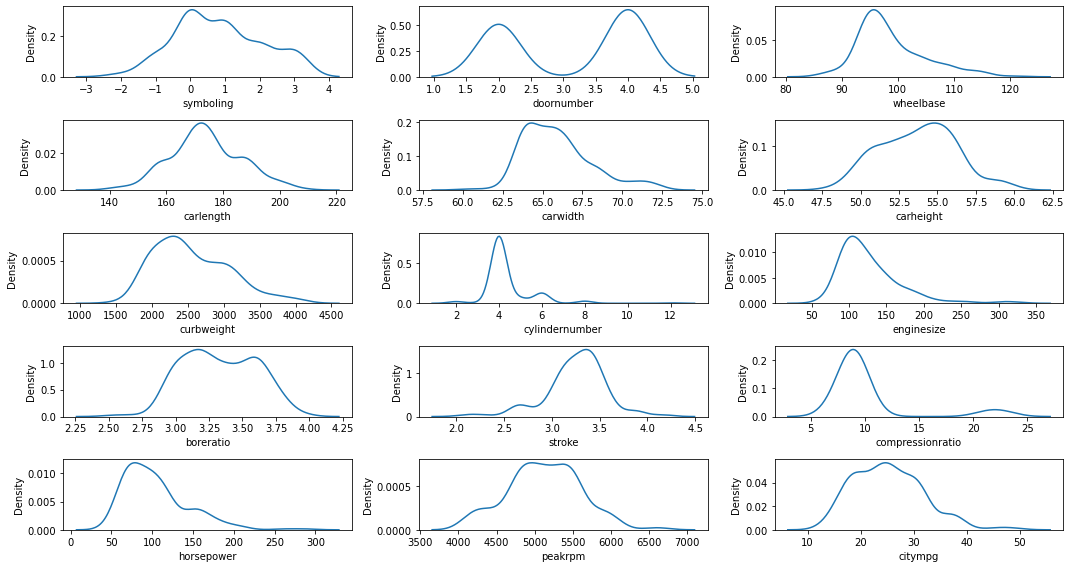

In [154]:
fig,ax = plt.subplots(nrows=5,ncols=3)

for var,subplot in zip(df_num.columns,ax.flatten()):
    sns.distplot(df_num[var],ax=subplot,hist=False)
plt.tight_layout()
plt.show()

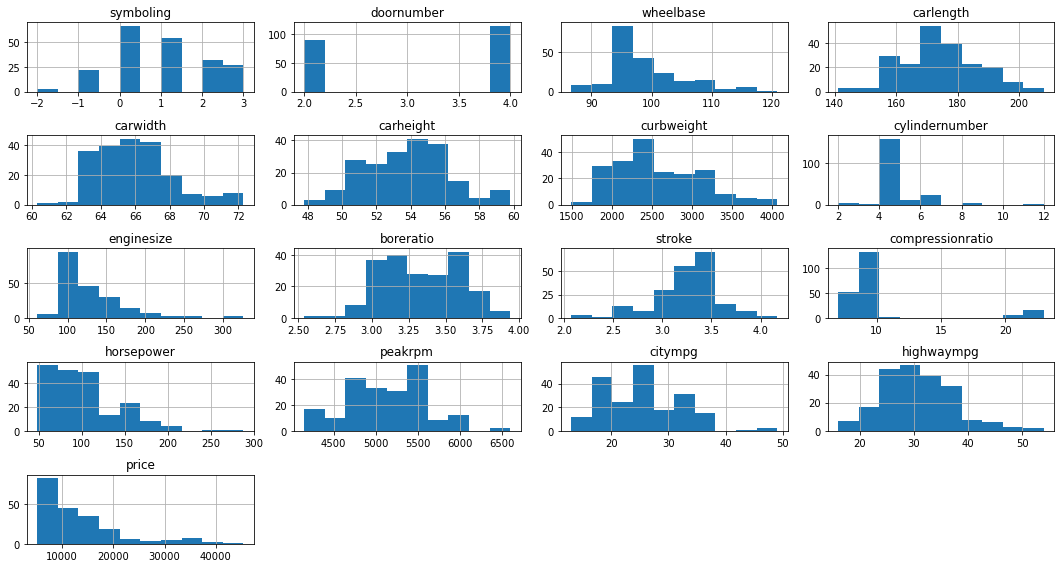

In [155]:
df_num.hist()

plt.tight_layout()

plt.show()

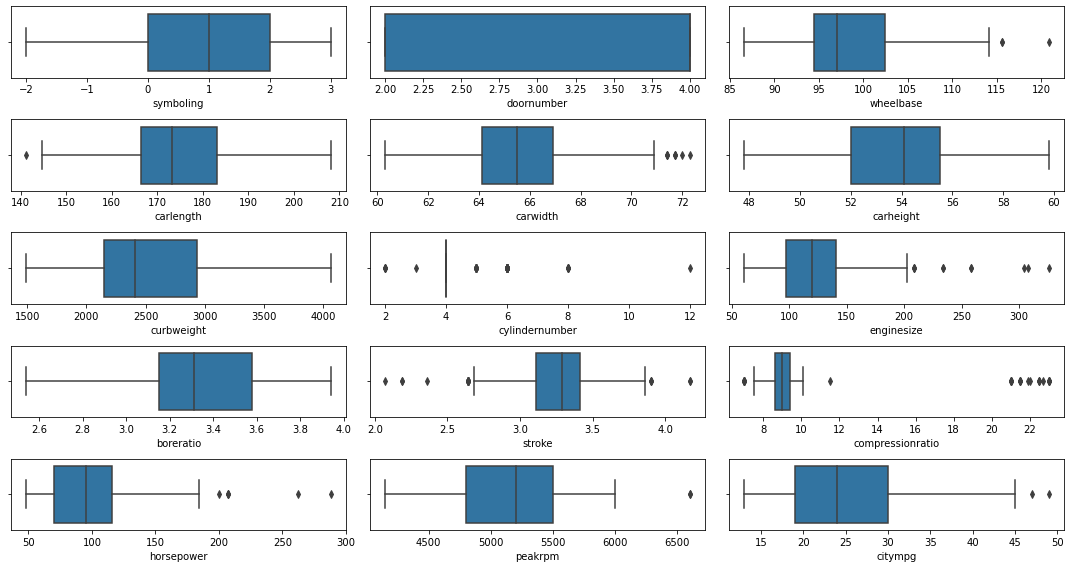

In [156]:
fig,ax = plt.subplots(nrows=5,ncols=3)

for var,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[var],ax=subplot)
plt.tight_layout()
plt.show()

In [157]:
# we have the outliers for numerical columns

# Visilization of target columns

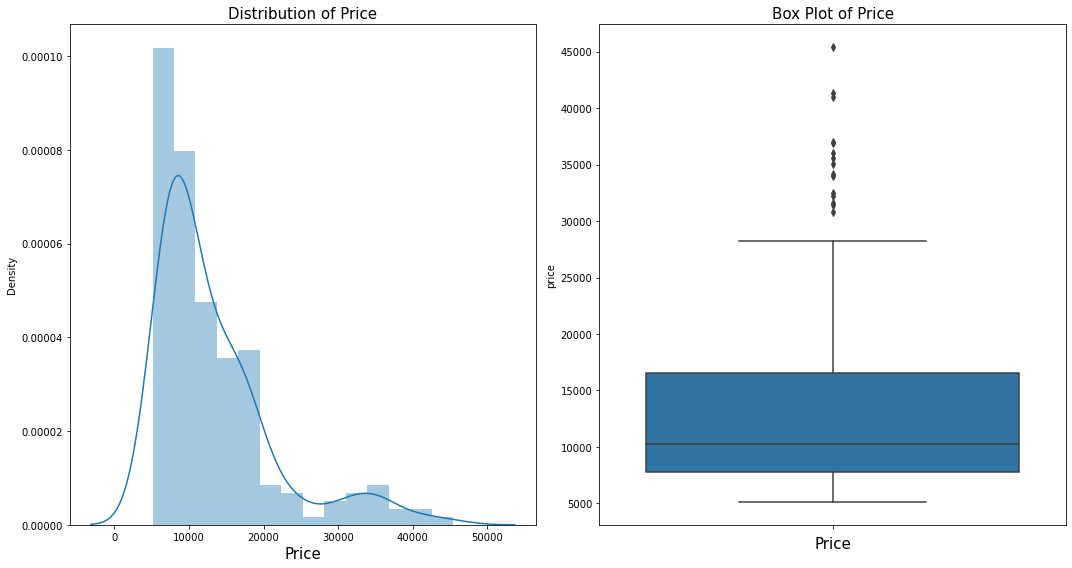

In [158]:
plt.subplot(121)
sns.distplot(df_car_price['price'])


plt.title("Distribution of Price",fontsize=15)
plt.xlabel("Price",fontsize=15)

plt.subplot(122)
sns.boxplot(y = df_car_price['price'])
plt.title("Box Plot of Price",fontsize=15)
plt.xlabel("Price",fontsize=15)

plt.tight_layout()
plt.show()

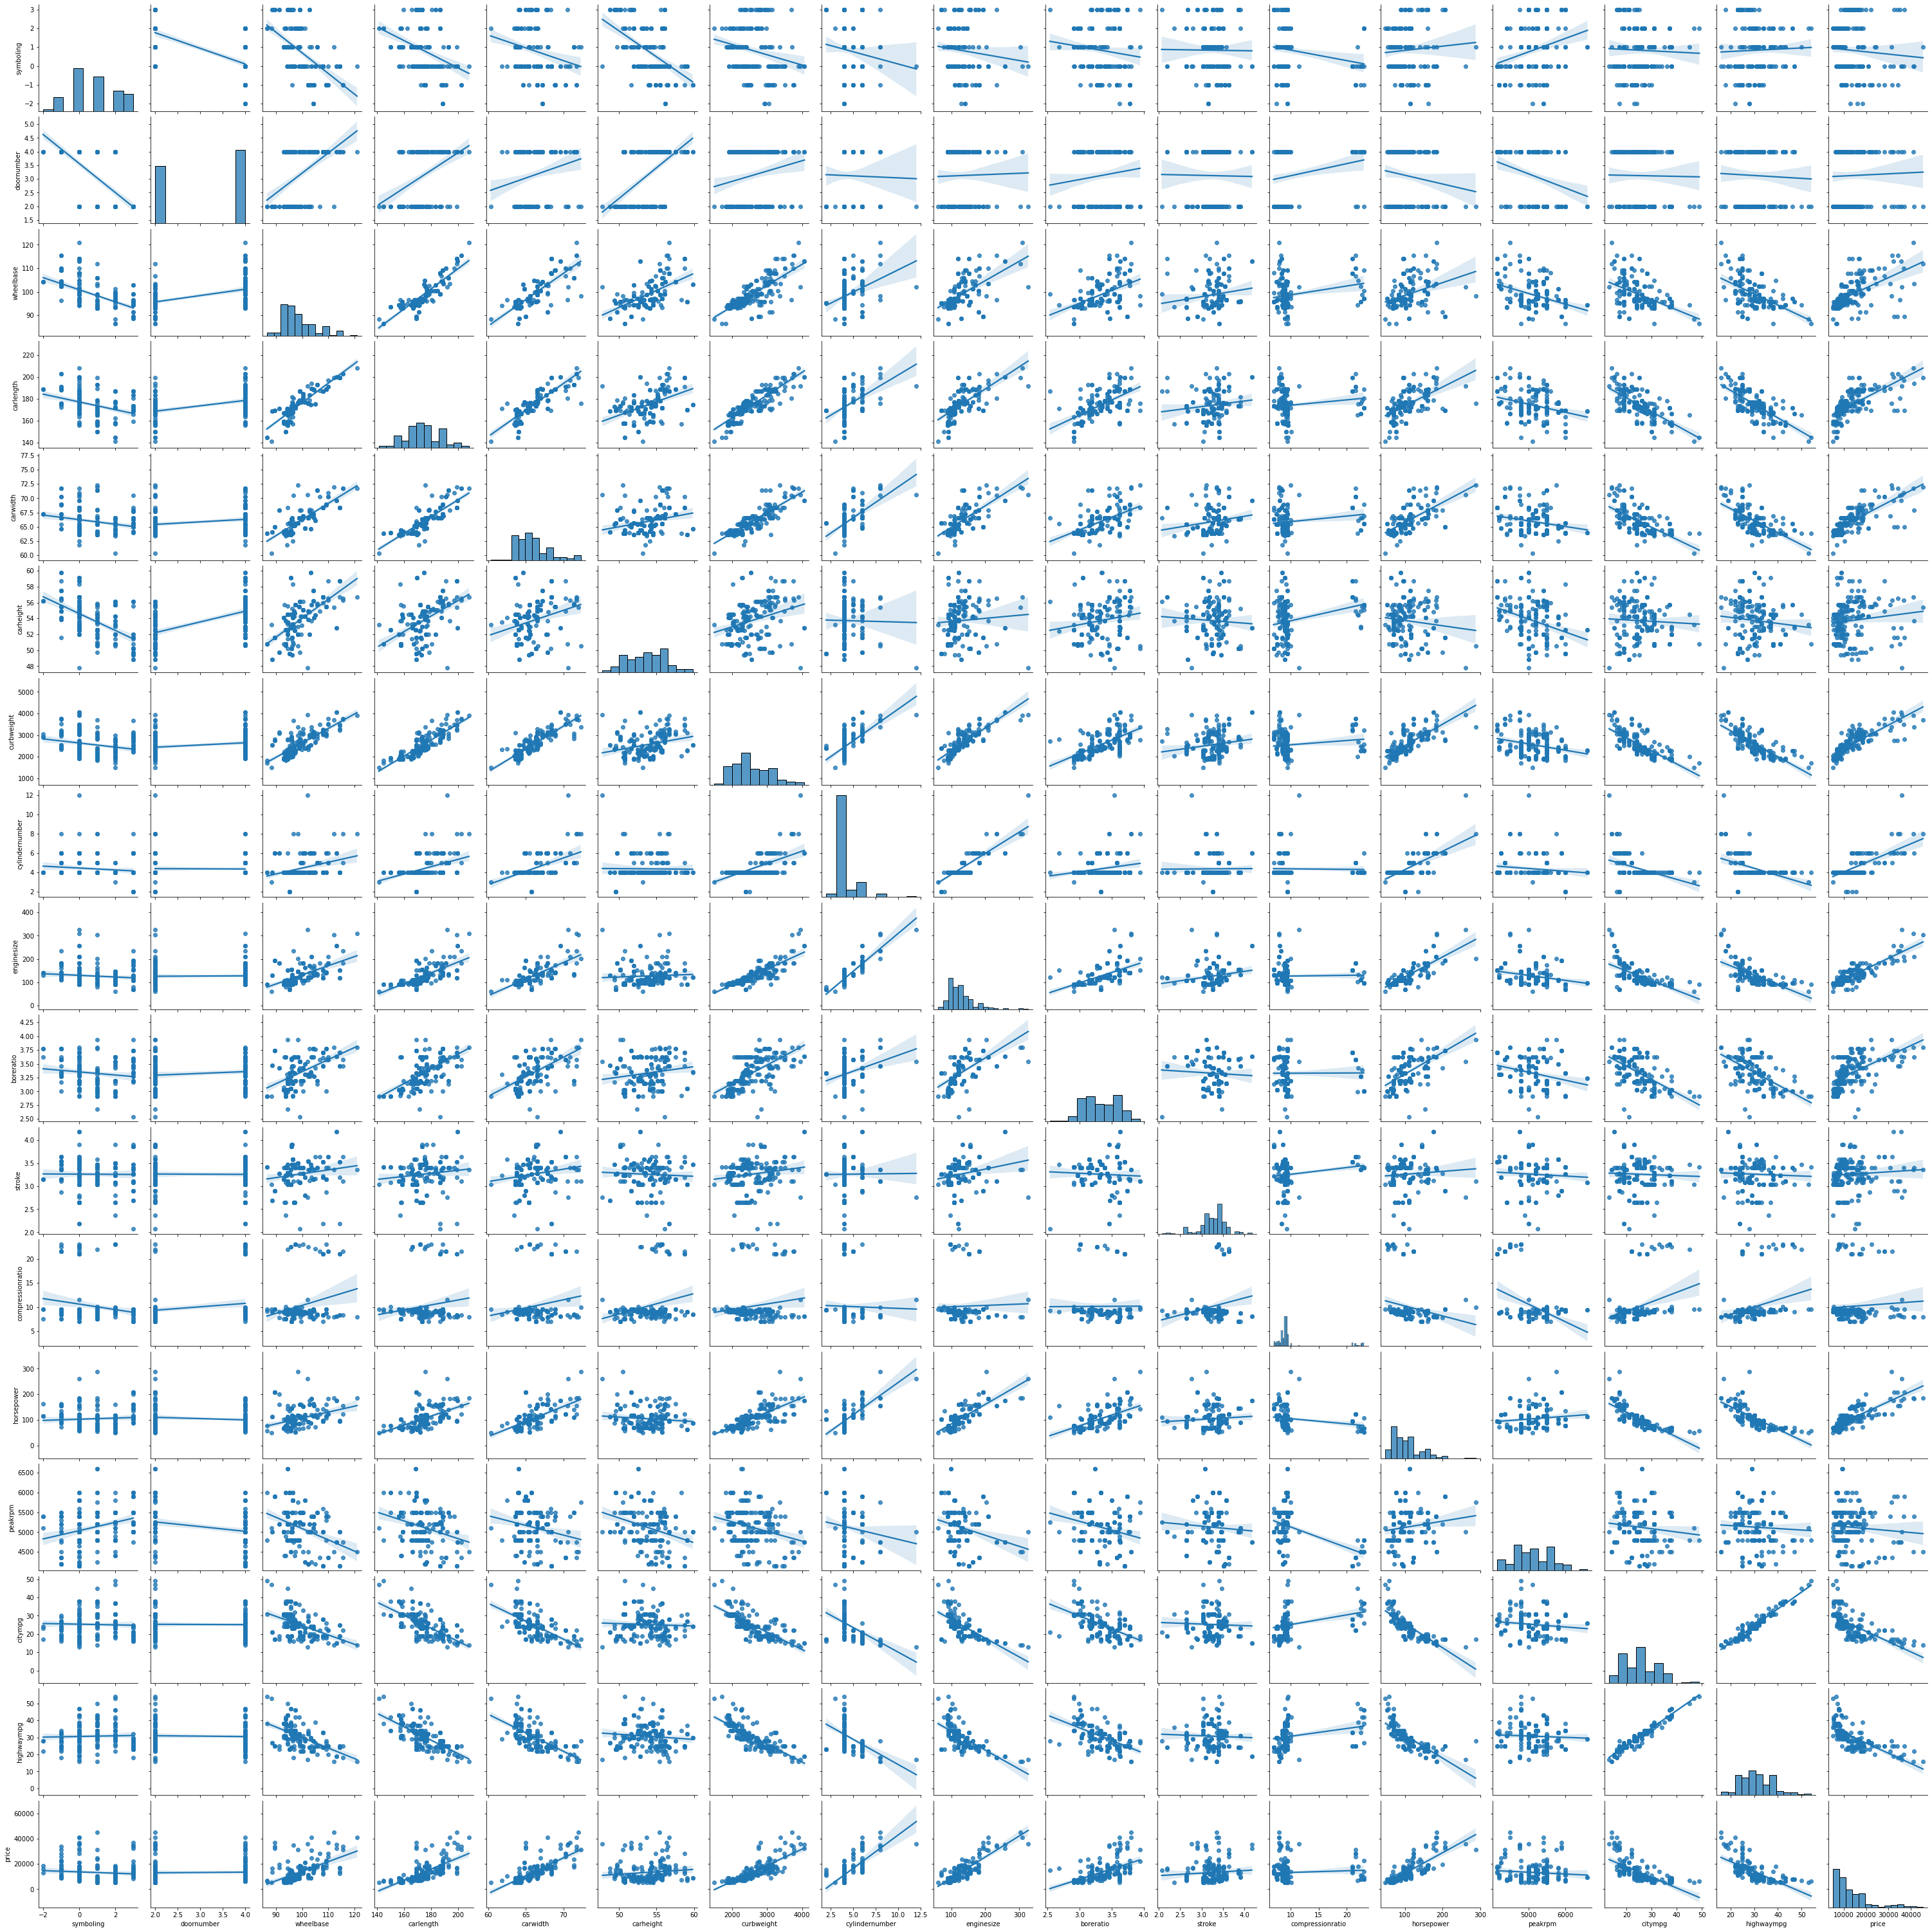

In [159]:
sns.pairplot(df_num,kind='reg')

plt.show()

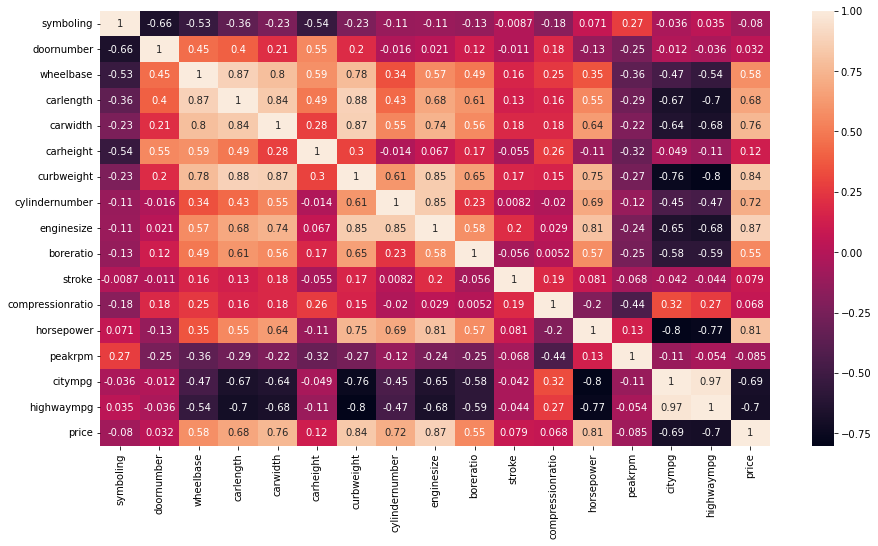

In [160]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [161]:
# There are strong multicolinearity present in the data set.

# Visualization for Categorical columns

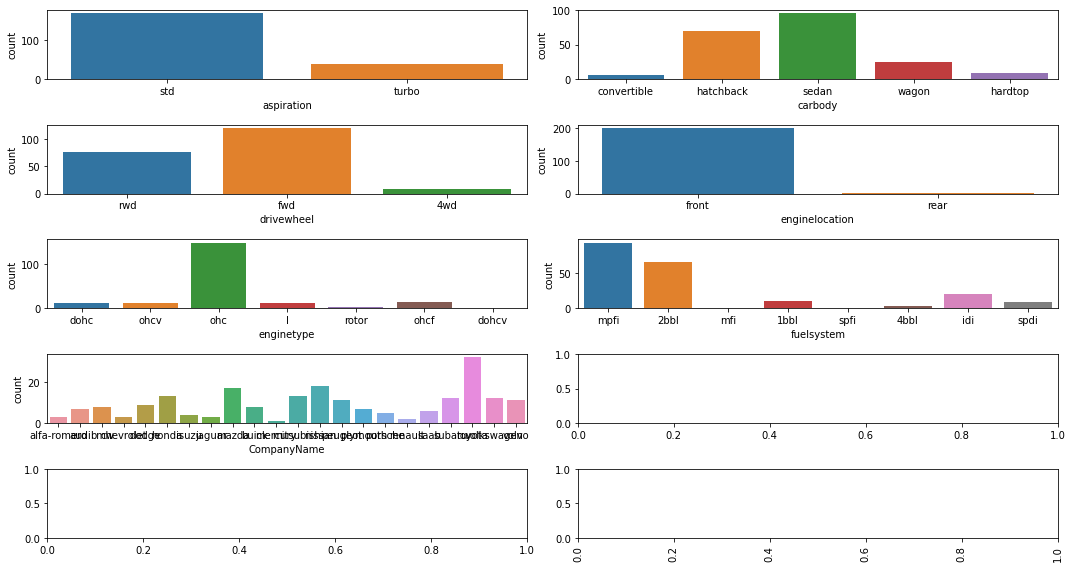

In [162]:
fig,ax = plt.subplots(nrows=5,ncols=2)

for var,subplot in zip(df_cat.iloc[:,1:].columns,ax.flatten()):
    sns.countplot(df_cat[var],ax=subplot)
    plt.xticks(rotation = 'vertical')
plt.tight_layout()

plt.show()

In [163]:
# We can see that there is high imbalance in Data.

# Preprocessing of data

In [164]:
#df_num = df_num.drop('price',axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(data=scaled,columns=df_num.columns)
df_num_scaled.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.7435,-1.1304,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,-0.3529,0.0744,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.0274
1,1.7435,-1.1304,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,-0.3529,0.0744,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.4045
2,0.1335,-1.1304,-0.7086,-0.2315,-0.1906,-0.5435,0.5149,1.5020,0.6040,-2.4049,0.6859,-0.2883,1.2645,-0.2630,-0.9530,-0.6916,0.4045
3,0.9385,0.8847,0.1737,0.2073,0.1365,0.2359,-0.4208,-0.3529,-0.4311,-0.5173,0.4622,-0.0360,-0.0537,0.7879,-0.1869,-0.1094,0.0845
4,0.9385,0.8847,0.1071,0.2073,0.2300,0.2359,0.5168,0.5746,0.2189,-0.5173,0.4622,-0.5407,0.2759,0.7879,-1.1062,-1.2739,0.5237


In [165]:
df_cat.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CompanyName
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [166]:
dummy = pd.get_dummies(data=df_cat)
dummy.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
df_num_scaled_2 = pd.concat([df_num_scaled,dummy],axis=1)
df_num_scaled_2.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,1.7435,-1.1304,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,-0.3529,0.0744,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.0274,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.7435,-1.1304,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,-0.3529,0.0744,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.4045,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.1335,-1.1304,-0.7086,-0.2315,-0.1906,-0.5435,0.5149,1.5020,0.6040,-2.4049,0.6859,-0.2883,1.2645,-0.2630,-0.9530,-0.6916,0.4045,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.9385,0.8847,0.1737,0.2073,0.1365,0.2359,-0.4208,-0.3529,-0.4311,-0.5173,0.4622,-0.0360,-0.0537,0.7879,-0.1869,-0.1094,0.0845,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.9385,0.8847,0.1071,0.2073,0.2300,0.2359,0.5168,0.5746,0.2189,-0.5173,0.4622,-0.5407,0.2759,0.7879,-1.1062,-1.2739,0.5237,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
df_num_scaled_2.shape

(205, 68)

In [169]:
X_full = df_num_scaled_2.drop('price',axis=1)
y = df_num_scaled_2['price']

In [170]:
y.head()

0   0.0274
1   0.4045
2   0.4045
3   0.0845
4   0.5237
Name: price, dtype: float64

In [171]:
X_full.shape

(205, 67)

In [172]:
y.shape

(205,)

# Splitting data for Train test

In [173]:
X_train_full,X_test_full,y_train_full,y_test_full = train_test_split(X_full,y,test_size=0.3,random_state=10)

print("X_train : ",X_train_full.shape)
print("y_train : ",y_train_full.shape)


print("y_test : ",X_test_full.shape)
print("y_test : ",y_test_full.shape)

X_train :  (143, 67)
y_train :  (143,)
y_test :  (62, 67)
y_test :  (62,)


In [174]:
# Bulding full model with OLS method

In [175]:
model_full_ols = sm.OLS(y_train_full,X_train_full).fit()
model_full_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     47.49
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           5.28e-48
Time:                        11:37:08   Log-Likelihood:                 35.166
No. Observations:                 143   AIC:                             33.67
Df Residuals:                      91   BIC:                             187.7
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
symboling                   0.0034      0.048      0.070      0.944      -0.092       0.099
doornumber                  0.0077      0.039      0.198      0.844      -0.070       0.085
wheelbase                   0.1420      0.095      1.494      0.139      -0.047       0.331
carlength                  -0.0789      0.093     -0.848      0.399      -0.264       0.106
carwidth                    0.1501      0.089      1.681      0.096      -0.027       0.328
carheight                  -0.0528      0.054     -0.973      0.333      -0.161       0.055
curbweight                  0.3179      0.137      2.320      0.023       0.046       0.590
cylindernumber             -0.0642      0.142     -0.452      0.652      -0.346       0.218
enginesize                  0.5188      0.166      3.133      0.002       0.190       0.848
boreratio                  -0.0395      0.075     -0.524      0.601      -0.189       0.110
stroke                     -0.0996      0.054     -1.834      0.070      -0.207       0.008
compressionratio           -0.3990      0.298     -1.337      0.185      -0.992       0.194
horsepower                  0.0369      0.158      0.233      0.816      -0.278       0.352
peakrpm                     0.1169      0.051      2.301      0.024       0.016       0.218
citympg                     0.0369      0.149      0.248      0.805      -0.259       0.333
highwaympg                  0.1028      0.145      0.711      0.479      -0.184       0.390
fueltype_diesel             0.5802      0.356      1.630      0.107      -0.127       1.287
fueltype_gas               -0.1454      0.251     -0.580      0.564      -0.644       0.353
aspiration_std              0.1292      0.101      1.284      0.202      -0.071       0.329
aspiration_turbo            0.3056      0.089      3.423      0.001       0.128       0.483
carbody_convertible         0.4841      0.143      3.381      0.001       0.200       0.769
carbody_hardtop             0.0967      0.140      0.689      0.493      -0.182       0.376
carbody_hatchback          -0.1046      0.073     -1.429      0.156      -0.250       0.041
carbody_sedan              -0.0257      0.078     -0.328      0.744      -0.181       0.130
carbody_wagon              -0.0157      0.109     -0.145      0.885      -0.231       0.200
drivewheel_4wd              0.1492      0.110      1.356      0.178      -0.069       0.368
drivewheel_fwd              0.2238      0.081      2.757      0.007       0.063       0.385
drivewheel_rwd              0.0619      0.121      0.510      0.611      -0.179       0.303
enginelocation_front       -0.1790      0.142     -1.257      0.212      -0.462       0.104
enginelocation_rear         0.6138      0.210      2.924      0.004       0.197       1.031
enginetype_dohc             0.0050      0.158  

In [176]:
# We can see that  model is getting rsqaure value 0.998 which it is able to example the 99.8 of variation for the model.
# We can see that condition number of model is very high which mean that it is having high multicollinearity affect the 
# interpretation of model.

In [177]:
# model performance 

In [178]:
y_pred = model_full_ols.predict(X_test_full)

rmse_test = np.sqrt(mean_absolute_error(y_true=y_test_full,y_pred=y_pred))
rmse_test

0.5037561910459503

In [179]:
y_pred_train = model_full_ols.predict(X_train_full) 
rmse_train = np.sqrt(mean_absolute_error(y_true=y_train_full,y_pred=y_pred_train))
rmse_train

0.3648597940925692

In [180]:
# We can see difference between train and test data.

In [181]:
# Removing the mutlicollinearity

In [182]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_full.values,i) for i in range(X_full.shape[1])]

vif['Colunms'] = X_full.columns

vif.sort_values(by='VIF',ascending=False)

,VIF,Colunms
33,inf,enginetype_ohc
50,inf,CompanyName_dodge
36,inf,enginetype_rotor
37,inf,fuelsystem_1bbl
38,inf,fuelsystem_2bbl
...,...,...
5,7.3047,carheight
0,6.2662,symboling
13,5.8650,peakrpm
10,5.1242,stroke


In [183]:
dict1 = vif[vif['VIF']<10]['Colunms'].to_dict()
list1 = []
for i in dict1:
     list1.append(dict1.get(i))
list1        

['symboling', 'doornumber', 'carheight', 'stroke', 'peakrpm']

In [184]:
# Linear regression model using sklearn

In [185]:
X_train_full.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
43,-0.6715,0.8847,-0.7419,-0.2721,-1.9196,-0.0923,-0.4208,-0.3529,-0.3829,-0.0731,-0.0812,-0.4145,-0.6621,-0.6833,-0.1869,-0.2549,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78,0.9385,-1.1304,-0.8418,-1.3609,-0.7046,-1.1999,-1.0619,-0.3529,-0.8403,-1.3315,-0.0812,-0.1874,-0.9156,0.7879,0.8857,1.0552,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
143,-0.6715,0.8847,-0.2591,-0.1665,-0.2373,-0.5025,-0.4150,-0.3529,-0.4551,1.0743,-1.9672,-0.2883,-0.2565,0.1574,0.1196,0.1818,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21,0.1335,-1.1304,-0.8418,-1.3609,-0.9850,-1.1999,-1.3083,-0.3529,-0.8885,-1.3315,-0.0812,-0.1849,-0.9156,0.7879,1.8051,1.4919,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
128,1.7435,-1.1304,-1.5409,-0.4184,-0.4242,-0.8717,0.4706,1.5020,1.6151,1.5184,-1.1361,-0.1622,2.6081,1.6285,-1.2595,-0.8372,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [186]:
X_test_full.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
131,0.9385,-1.1304,-0.4422,0.2235,0.3235,-1.3230,-0.1840,-0.3529,0.1226,0.4821,2.0605,-0.3641,-0.3579,-0.0528,-0.3401,0.0362,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
117,-0.6715,0.8847,1.5388,1.0279,1.1179,0.9334,1.1059,-0.3529,0.1707,1.0372,-0.1452,-0.7931,0.9603,0.9980,-1.1062,-0.9828,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
63,-0.6715,0.8847,0.0072,0.3048,0.2767,0.7282,-0.2167,-0.3529,-0.1181,0.2230,0.4302,3.1692,-1.0170,-0.9985,1.6519,1.6375,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
56,1.7435,-1.1304,-0.5754,-0.4103,-0.0971,-1.6922,-0.3380,-2.2078,-1.3699,0.0009,-0.0013,-0.1874,-0.0790,1.8387,-1.2595,-1.1283,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
49,-0.6715,-1.1304,0.5399,1.4342,2.1927,-2.4307,2.6847,7.0668,4.7927,0.7782,-1.5836,0.3426,4.0023,-0.2630,-1.8724,-2.0017,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [187]:
linreg =  LinearRegression()
linreg.fit(X_train_full,y_train_full)

y_pred_reg = linreg.predict(X_test_full)

In [188]:
linreg.intercept_

4175704510805.6245

In [189]:
linreg.coef_

array([ 3.38567570e-03,  6.84727531e-03,  1.34040885e-01, -8.59910459e-02,
        1.29049470e-01, -5.43611010e-02,  3.61918385e-01, -4.96952605e-02,
        5.38061025e-01, -2.97470470e-02, -9.16280568e-02, -2.62632487e-01,
        2.93402183e-03,  1.31534303e-01,  3.39083626e-03,  1.19957597e-01,
       -5.72810899e+12, -5.19214716e+11, -1.04303038e+13, -1.04303038e+13,
        1.60278039e+11,  1.60278039e+11,  1.60278039e+11,  1.60278039e+11,
        1.60278039e+11, -2.34161802e+12, -2.34161802e+12, -2.34161802e+12,
        4.58222178e+12, -3.28420545e+12,  1.38799705e+11,  5.04139740e+11,
       -2.43028544e+12,  1.38799705e+11,  8.00522694e+12,  1.38799705e+11,
        8.75274820e+11,  2.65780011e+12,  2.65780011e+12,  1.92132499e+12,
        7.86669438e+12,  2.65780011e+12,  2.65780011e+12,  2.65780011e+12,
        3.37911621e+08,  1.57633241e+12,  1.57633241e+12,  1.57633241e+12,
        1.57633241e+12,  4.14541755e+12,  1.57633241e+12,  1.57633241e+12,
        1.57633241e+12,  

In [190]:
rmse = np.sqrt(mean_squared_error(y_true=y_test_full,y_pred=y_pred_reg))
rmse

676719349178.0647

In [191]:
cols = ['Model Name','R-Squared','Adjusted R-Sqaure','MSE',"RMSE",'MAE','MAPE']
model_metric_table =  pd.DataFrame(columns=cols)

In [192]:
def mape(actual,predited):
    return (np.mean(np.abs((actual-predited)/actual))*100)

In [193]:
def model_evaluate_performance(model,name,X_train,X_test,y_train,y_test):
    global model_metric_table
    
    r_sq = model.score(X_train,y_train)
    n  = X_train.shape[0]
    k  = X_train.shape[1]
    
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    y_pred = model.predict(X_test)
    metrics = pd.Series({'Model Name':name,
                      'R-Squared':r_sq,
                      'Adjusted R-Sqaure':r_sq_adj,
                      'MSE':mean_squared_error(y_test,y_pred),
                      'RMSE': np.sqrt(mean_squared_error(y_test,y_pred)),
                      'MAE' : mean_absolute_error(y_test,y_pred),
                       'MAPE' : mape(y_test,y_pred)
                      })
    
    model_metric_table = model_metric_table.append(metrics,ignore_index=True)
    
    return  model_metric_table


In [194]:
def get_validation_score(model,name,X_train,y_train):
    
    scores = cross_val_score(estimator=model,
                            X=X_train,
                            y=y_train,
                            cv=5,
                            scoring='r2')
    print("Model name ",name)
    print("All scores ",scores)
    print("Max scores ",max(scores))
    print("Min scores ",min(scores))
    print("Average scores ",np.mean(scores))

In [195]:
model_evaluate_performance(linreg,'Linear Regression with All Variables',X_train_full,X_test_full,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766


In [196]:
get_validation_score(linreg,'Linear Regression with All Variables',X_train_full,y_train_full)

Model name  Linear Regression with All Variables
All scores  [0.92228257 0.77372648 0.7444115  0.91129369 0.87114232]
Max scores  0.922282572580378
Min scores  0.7444114991492641
Average scores  0.844571311440401


In [197]:
len(X_train_full.columns)

67

# Feature Selections

In [198]:
linreg_rfe1 = LinearRegression()

rfe_model1 = RFE(estimator=linreg_rfe1,n_features_to_select=5,step=1)

rfe_model1 = rfe_model1.fit(X_train_full,y_train_full)

feat_index1 = pd.Series(data=rfe_model1.ranking_,index=X_train_full.columns)


In [199]:
list(zip(X_train_full.columns,rfe_model1.support_,rfe_model1.ranking_))

[('symboling', False, 61),
 ('doornumber', False, 56),
 ('wheelbase', False, 41),
 ('carlength', False, 42),
 ('carwidth', False, 9),
 ('carheight', False, 44),
 ('curbweight', False, 12),
 ('cylindernumber', False, 46),
 ('enginesize', True, 1),
 ('boreratio', False, 47),
 ('stroke', False, 31),
 ('compressionratio', False, 25),
 ('horsepower', False, 50),
 ('peakrpm', False, 28),
 ('citympg', False, 51),
 ('highwaympg', False, 27),
 ('fueltype_diesel', False, 23),
 ('fueltype_gas', False, 26),
 ('aspiration_std', False, 21),
 ('aspiration_turbo', False, 32),
 ('carbody_convertible', False, 8),
 ('carbody_hardtop', False, 55),
 ('carbody_hatchback', False, 33),
 ('carbody_sedan', False, 39),
 ('carbody_wagon', False, 40),
 ('drivewheel_4wd', False, 57),
 ('drivewheel_fwd', False, 29),
 ('drivewheel_rwd', False, 43),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', False, 6),
 ('enginetype_dohc', False, 36),
 ('enginetype_dohcv', False, 59),
 ('enginetype_l', False, 38),
 (

In [200]:
cols = X_train_full.columns[rfe_model1.support_]
cols

Index(['enginesize', 'enginelocation_front', 'enginetype_rotor',
       'CompanyName_audi', 'CompanyName_bmw'],
      dtype='object')

In [201]:
X_train_signi1 = X_train_full[cols]
X_test_signi1 = X_test_full[cols]

linreg_signi1 = LinearRegression()

linreg_signi1.fit(X_train_signi1,y_train_full)

model_evaluate_performance(linreg_signi1,'Linear Regression with 5 Significant variable',X_train_signi1,X_test_signi1,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531


In [202]:
linreg_rfe2 = LinearRegression()

rfe_model2 = RFE(estimator=linreg_rfe2,n_features_to_select=10,step=1)

rfe_model2 = rfe_model2.fit(X_train_full,y_train_full)

list(zip(X_train_full.columns,rfe_model2.support_,rfe_model2.ranking_))

[('symboling', False, 56),
 ('doornumber', False, 51),
 ('wheelbase', False, 36),
 ('carlength', False, 37),
 ('carwidth', False, 4),
 ('carheight', False, 39),
 ('curbweight', False, 7),
 ('cylindernumber', False, 41),
 ('enginesize', True, 1),
 ('boreratio', False, 42),
 ('stroke', False, 26),
 ('compressionratio', False, 20),
 ('horsepower', False, 45),
 ('peakrpm', False, 23),
 ('citympg', False, 46),
 ('highwaympg', False, 22),
 ('fueltype_diesel', False, 18),
 ('fueltype_gas', False, 21),
 ('aspiration_std', False, 16),
 ('aspiration_turbo', False, 27),
 ('carbody_convertible', False, 3),
 ('carbody_hardtop', False, 50),
 ('carbody_hatchback', False, 28),
 ('carbody_sedan', False, 34),
 ('carbody_wagon', False, 35),
 ('drivewheel_4wd', False, 52),
 ('drivewheel_fwd', False, 24),
 ('drivewheel_rwd', False, 38),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohc', False, 31),
 ('enginetype_dohcv', False, 54),
 ('enginetype_l', False, 33),
 ('e

In [203]:
cols2 = X_train_full.columns[rfe_model2.support_]
cols2

Index(['enginesize', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_rotor', 'fuelsystem_4bbl', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_jaguar',
       'CompanyName_porsche'],
      dtype='object')

In [204]:
X_train_signi2 = X_train_full[cols2]
X_test_signi2 = X_test_full[cols2]

linreg_signi2 = LinearRegression()

linreg_signi2.fit(X_train_signi2,y_train_full)

model_evaluate_performance(linreg_signi2,'Linear Regression with 10 Significant variable',X_train_signi2,X_test_signi2,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330


In [205]:
get_validation_score(linreg_signi2,'Linear Regression with Significant variable with 10 variable',X_train_signi2,y_train_full)

Model name  Linear Regression with Significant variable with 10 variable
All scores  [0.87914193 0.82058323 0.59455572 0.89394156 0.89159589]
Max scores  0.8939415572525358
Min scores  0.5945557241008989
Average scores  0.8159636661286497


# Gradient Decent

In [206]:
sgd = SGDRegressor(random_state=10)

linreg_with_SGD1 = sgd.fit(X_train_full,y_train_full)

model_evaluate_performance(linreg_with_SGD1,'Linear Regression with Gradient Decent with All Variables',X_train_full,X_test_full,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593


In [207]:
get_validation_score(linreg_with_SGD1,'Linear Regression with Gradient Decent with All Variables',X_train_full,y_train_full)

Model name  Linear Regression with Gradient Decent with All Variables
All scores  [0.83287965 0.82850103 0.64368601 0.88843598 0.89713782]
Max scores  0.8971378157485032
Min scores  0.6436860102281601
Average scores  0.8181280963907632


In [208]:
sgd = SGDRegressor(random_state=10)

linreg_with_SGD2 = sgd.fit(X_train_signi1,y_train_full)

model_evaluate_performance(linreg_with_SGD2,'Linear Regression with Gradient Decent With Significant Variables',X_train_signi1,X_test_signi1,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593
4,Linear Regression with Gradient Decent With Si...,0.8225,0.8160,0.3310,0.5753,0.4296,265.4883


In [209]:
get_validation_score(linreg_with_SGD2,'Linear Regression with Gradient Decent With Significant Variables',X_train_signi1,y_train_full)

Model name  Linear Regression with Gradient Decent With Significant Variables
All scores  [0.81129882 0.72182156 0.48981374 0.88828081 0.83223947]
Max scores  0.8882808112477318
Min scores  0.48981373791442184
Average scores  0.7486908804227238


# Regularization

In [210]:
ridge1 = Ridge(alpha=1,max_iter=100,random_state=10)
ridge1.fit(X_train_full,y_train_full)
model_evaluate_performance(ridge1,'Ridge Regression with All variable ',X_train_full,X_test_full,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593
4,Linear Regression with Gradient Decent With Si...,0.8225,0.8160,0.3310,0.5753,0.4296,265.4883
5,Ridge Regression with All variable,0.9575,0.9195,0.1366,0.3695,0.2578,179.3182


In [211]:
get_validation_score(ridge1,'Ridge Regression with All variable ',X_train_full,y_train_full)

Model name  Ridge Regression with All variable 
All scores  [0.90431309 0.86006973 0.80326164 0.88845693 0.91736661]
Max scores  0.9173666086700294
Min scores  0.8032616425776656
Average scores  0.874693598402988


In [212]:
ridge2 = Ridge(alpha=1,max_iter=100,random_state=10)
ridge2.fit(X_train_signi1,y_train_full)
model_evaluate_performance(ridge2,'Ridge Regression with Significant variable',X_train_signi1,X_test_signi1,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593
4,Linear Regression with Gradient Decent With Si...,0.8225,0.8160,0.3310,0.5753,0.4296,265.4883
5,Ridge Regression with All variable,0.9575,0.9195,0.1366,0.3695,0.2578,179.3182
6,Ridge Regression with Significant variable,0.8760,0.8715,0.2400,0.4899,0.3610,226.7599


In [213]:
get_validation_score(ridge2,'Ridge Regression with Significant variable',X_train_signi1,y_train_full)

Model name  Ridge Regression with Significant variable
All scores  [0.85014316 0.79448253 0.56877577 0.89623101 0.8836434 ]
Max scores  0.8962310115214616
Min scores  0.5687757691212132
Average scores  0.7986551740483602


In [214]:
lasso1 =  Lasso(alpha=0.01,max_iter=10,random_state=10)
lasso1.fit(X_train_full,y_train_full)
model_evaluate_performance(lasso1,'Lasso Regression with All variable ',X_train_full,X_test_full,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593
4,Linear Regression with Gradient Decent With Si...,0.8225,0.8160,0.3310,0.5753,0.4296,265.4883
5,Ridge Regression with All variable,0.9575,0.9195,0.1366,0.3695,0.2578,179.3182
6,Ridge Regression with Significant variable,0.8760,0.8715,0.2400,0.4899,0.3610,226.7599
7,Lasso Regression with All variable,0.9080,0.8259,0.2369,0.4868,0.3267,242.3075


In [215]:
get_validation_score(lasso1,'Lasso Regression with All variable',X_train_full,y_train_full)

Model name  Lasso Regression with All variable
All scores  [0.79404277 0.83712316 0.68637866 0.8494584  0.91509299]
Max scores  0.9150929899154775
Min scores  0.6863786568234282
Average scores  0.8164191937195046


In [216]:
lasso2 =  Lasso(alpha=0.01,max_iter=10,random_state=10)
lasso2.fit(X_train_signi1,y_train_full)
model_evaluate_performance(lasso2,'Lasso Regression with Significant variable',X_train_signi1,X_test_signi1,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593
4,Linear Regression with Gradient Decent With Si...,0.8225,0.8160,0.3310,0.5753,0.4296,265.4883
5,Ridge Regression with All variable,0.9575,0.9195,0.1366,0.3695,0.2578,179.3182
6,Ridge Regression with Significant variable,0.8760,0.8715,0.2400,0.4899,0.3610,226.7599
7,Lasso Regression with All variable,0.9080,0.8259,0.2369,0.4868,0.3267,242.3075
8,Lasso Regression with Significant variable,0.8570,0.8518,0.2969,0.5448,0.4035,247.6538


In [217]:
get_validation_score(lasso2,'Lasso Regression with Significant variable',X_train_signi1,y_train_full)

Model name  Lasso Regression with Significant variable
All scores  [0.80517066 0.78037661 0.56590816 0.89319036 0.8531306 ]
Max scores  0.8931903617580672
Min scores  0.5659081571441031
Average scores  0.7795552789391853


In [218]:
elastic1 = ElasticNet(alpha=0.1,l1_ratio=0.01,max_iter=500)
elastic1.fit(X_train_full,y_train_full)
model_evaluate_performance(elastic1,'Elastic Regression with Significant variable',X_train_full,X_test_full,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593
4,Linear Regression with Gradient Decent With Si...,0.8225,0.8160,0.3310,0.5753,0.4296,265.4883
5,Ridge Regression with All variable,0.9575,0.9195,0.1366,0.3695,0.2578,179.3182
6,Ridge Regression with Significant variable,0.8760,0.8715,0.2400,0.4899,0.3610,226.7599
7,Lasso Regression with All variable,0.9080,0.8259,0.2369,0.4868,0.3267,242.3075
8,Lasso Regression with Significant variable,0.8570,0.8518,0.2969,0.5448,0.4035,247.6538
9,Elastic Regression with Significant variable,0.9089,0.8275,0.1957,0.4424,0.3037,227.1192


In [219]:
get_validation_score(elastic1,'Lasso Regression with All variable',X_train_full,y_train_full)

Model name  Lasso Regression with All variable
All scores  [0.85150607 0.83318689 0.69161307 0.8912953  0.89916456]
Max scores  0.8991645581336881
Min scores  0.6916130661477768
Average scores  0.8333531748725864


# Hyperparameter Tuning

In [220]:
tuned_parameters_ridge = [{'alpha':[1e-5,1e-2,0.1,1,5,10,20,40,50]}]

ridge3 = Ridge(random_state=15)

ridge_grid1 = GridSearchCV(estimator=ridge3,
                         param_grid=tuned_parameters_ridge,
                         cv=10)
ridge_grid1.fit(X_train_full,y_train_full)

print("Best parameters for Ridge Regression : ",ridge_grid1.best_params_)

Best parameters for Ridge Regression :  {'alpha': 1}


In [221]:
tuned_parameters_lasso = [{'alpha':[1e-5,1e-2,0.1,1,5,10,20,40,50]}]

lasso3 = Lasso(random_state=15)

lasso_grid1 = GridSearchCV(estimator=lasso3,
                         param_grid=tuned_parameters_lasso,
                         cv=10)
lasso_grid1.fit(X_train_full,y_train_full)

print("Best parameters for Lasso Regression : ",lasso_grid1.best_params_)

Best parameters for Lasso Regression :  {'alpha': 0.01}


In [222]:
lasso4 = Lasso(alpha=lasso_grid1.best_params_['alpha'],max_iter=500)
lasso4.fit(X_train_full,y_train_full)
model_evaluate_performance(lasso4,'Lasso Regression with GridSearchCV',X_train_full,X_test_full,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593
4,Linear Regression with Gradient Decent With Si...,0.8225,0.8160,0.3310,0.5753,0.4296,265.4883
5,Ridge Regression with All variable,0.9575,0.9195,0.1366,0.3695,0.2578,179.3182
6,Ridge Regression with Significant variable,0.8760,0.8715,0.2400,0.4899,0.3610,226.7599
7,Lasso Regression with All variable,0.9080,0.8259,0.2369,0.4868,0.3267,242.3075
8,Lasso Regression with Significant variable,0.8570,0.8518,0.2969,0.5448,0.4035,247.6538
9,Elastic Regression with Significant variable,0.9089,0.8275,0.1957,0.4424,0.3037,227.1192


In [223]:
tuned_parameters_elastic = [{'alpha':[1e-5,1e-2,0.1,1,5,10,20,40,50],
                            'l1_ratio':[0.0001,0.001,0.01,0.1,0.2]}]

elastic3 = ElasticNet(random_state=15)

elastic_grid1 = GridSearchCV(estimator=elastic3,
                         param_grid=tuned_parameters_elastic,
                         cv=10)
elastic_grid1.fit(X_train_full,y_train_full)

print("Best parameters for elastic Regression : ",elastic_grid1.best_params_)

Best parameters for elastic Regression :  {'alpha': 0.01, 'l1_ratio': 0.1}


In [224]:
elastic4 = ElasticNet(alpha=elastic_grid1.best_params_['alpha'],l1_ratio=elastic_grid1.best_params_['l1_ratio'],max_iter=500)
elastic4.fit(X_train_full,y_train_full)
model_evaluate_performance(elastic4,'Elastic Regression with GridSearchCV',X_train_full,X_test_full,y_train_full,y_test_full)

,Model Name,R-Squared,Adjusted R-Sqaure,MSE,RMSE,MAE,MAPE
0,Linear Regression with All Variables,0.9631,0.9301,457949077551983408185344.0000,676719349178.0647,219781368799.8615,46600698628913.4766
1,Linear Regression with 5 Significant variable,0.8834,0.8791,0.2272,0.4766,0.3427,213.1531
2,Linear Regression with 10 Significant variable,0.8933,0.8852,0.1691,0.4112,0.3020,176.7330
3,Linear Regression with Gradient Decent with Al...,0.9003,0.8112,0.2358,0.4855,0.3211,241.2593
4,Linear Regression with Gradient Decent With Si...,0.8225,0.8160,0.3310,0.5753,0.4296,265.4883
5,Ridge Regression with All variable,0.9575,0.9195,0.1366,0.3695,0.2578,179.3182
6,Ridge Regression with Significant variable,0.8760,0.8715,0.2400,0.4899,0.3610,226.7599
7,Lasso Regression with All variable,0.9080,0.8259,0.2369,0.4868,0.3267,242.3075
8,Lasso Regression with Significant variable,0.8570,0.8518,0.2969,0.5448,0.4035,247.6538
9,Elastic Regression with Significant variable,0.9089,0.8275,0.1957,0.4424,0.3037,227.1192


In [225]:
# We can see that Linear Regression with All Variables have highest rsquare value but also have a high RMSE value
# Ridge Regression with All variable have overall high rsquare and have least error so we can take the model for all variable

# Linear Regression with 10 Significant  variable have overall good accuary with significant variable with lower RMSE value.
# we are choosing   Linear Regression with 10 Significant  variable as final model.

In [226]:
# Top 5 variables affecting the  Price of car

In [227]:
[value for index,value in enumerate(list(zip(X_train_full.columns,rfe_model1.support_,rfe_model1.ranking_))) if value[2] == True]

[('enginesize', True, 1),
 ('enginelocation_front', True, 1),
 ('enginetype_rotor', True, 1),
 ('CompanyName_audi', True, 1),
 ('CompanyName_bmw', True, 1)]

In [228]:
# Top 10 variables affecting the  Price of car

In [229]:
[value for index,value in enumerate(list(zip(X_train_full.columns,rfe_model2.support_,rfe_model2.ranking_))) if value[2] == True]

[('enginesize', True, 1),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_4bbl', True, 1),
 ('CompanyName_audi', True, 1),
 ('CompanyName_bmw', True, 1),
 ('CompanyName_buick', True, 1),
 ('CompanyName_jaguar', True, 1),
 ('CompanyName_porsche', True, 1)]

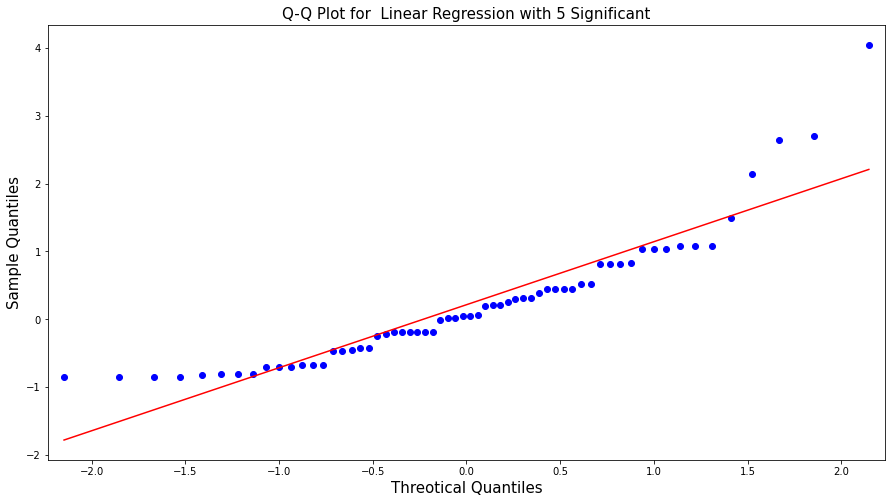

In [230]:
y_pred_rfe1 = linreg_signi1.predict(X_test_signi1)
y_res1 = y_test_full - y_pred_rfe1

qqplot(data=y_pred_rfe1,line='r')
plt.title("Q-Q Plot for  Linear Regression with 5 Significant",fontsize=15)
plt.xlabel("Threotical Quantiles",fontsize=15)
plt.ylabel("Sample Quantiles",fontsize=15)
plt.show()

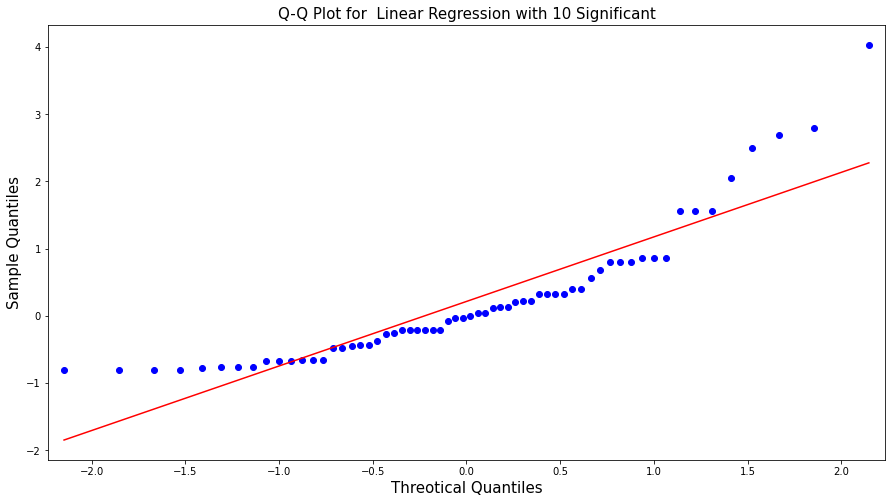

In [231]:
y_pred_rfe2 = linreg_signi2.predict(X_test_signi2)
y_res2 = y_test_full - y_pred_rfe2

qqplot(data=y_pred_rfe2,line='r')
plt.title("Q-Q Plot for  Linear Regression with 10 Significant",fontsize=15)
plt.xlabel("Threotical Quantiles",fontsize=15)
plt.ylabel("Sample Quantiles",fontsize=15)
plt.show()